Dataset: https://www.kaggle.com/datasets/kazanova/sentiment140

## 의존성 설치 및 임포트

In [23]:
!pip install pandas matplotlib wordcloud nltk


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
# WordCloud 관련
from wordcloud import WordCloud
from PIL import Image
# 텍스트 파싱
import nltk
# 정규표현식 - 특수문자 제거
import re
# WordCloud - 상위 N개 빈출 문자
from collections import Counter

In [25]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 환경변수

In [26]:
csv_path = 'sentiment140-dataset.csv'

## 데이터 로드

In [27]:
tweets = pd.read_csv(csv_path, encoding='ISO-8859-1', header=None, index_col=False)
tweets.columns = columns=['sentiment', 'id', 'timestamp', 'flag', 'username', 'text']

In [28]:
tweets

,sentiment,id,timestamp,flag,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [29]:
positive_tweets = tweets[tweets['sentiment']==4]
negative_tweets = tweets[tweets['sentiment']==0]

In [30]:
positive_tweets

,sentiment,id,timestamp,flag,username,text
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [31]:
negative_tweets

,sentiment,id,timestamp,flag,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
799995,0,2329205009,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,dandykim,Sick Spending my day laying in bed listening ...
799996,0,2329205038,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,bigenya,Gmail is down?
799997,0,2329205473,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,LeeLHoke,rest in peace Farrah! So sad
799998,0,2329205574,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,davidlmulder,@Eric_Urbane Sounds like a rival is flagging y...


## 시각화(예제)

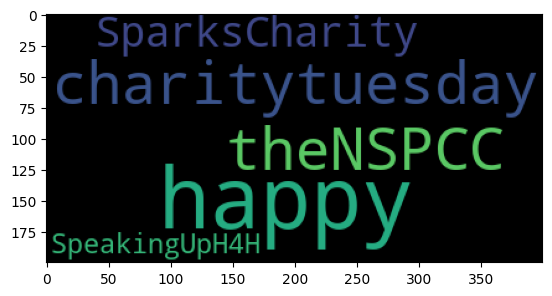

In [32]:
wc = WordCloud().generate(positive_tweets['text'][1599999])
plt.imshow(wc)

## 샘플링

In [33]:
# positive_tweets = tweets[tweets['sentiment']==4]
# negative_tweets = tweets[tweets['sentiment']==0]

def remove_special_symbol(text): # 특수문자 제거
    return re.sub(r'[^A-Za-z0-9\s]', '', text)

In [34]:
# 하나의 큰 문자열로 변환
positive_texts = ' '.join(positive_tweets['text'])
negative_texts = ' '.join(negative_tweets['text'])

In [35]:
# 특수문자 제거
positive_symbol_removed_texts = remove_special_symbol(positive_texts)
negative_symbol_removed_texts = remove_special_symbol(negative_texts)

In [36]:
# 토크나이즈
positive_tokens = nltk.word_tokenize(positive_symbol_removed_texts)
negative_tokens = nltk.word_tokenize(negative_symbol_removed_texts)

In [37]:
stopwords = nltk.corpus.stopwords.words('english') # 영어 불용어 세트(소문자)

In [38]:
# print(positive_tokens)

In [39]:
# 불용어 제거
positive_stopwords_removed_tokens = [t.lower() for t in positive_tokens if t.lower() not in stopwords]
negative_stopwords_removed_tokens = [t.lower() for t in negative_tokens if t.lower() not in stopwords]

In [40]:
# positive_tokens

In [41]:
# 카운터 생성( 단어 : 빈도수 )
positive_count_set = Counter(positive_stopwords_removed_tokens)
negative_count_set = Counter(negative_stopwords_removed_tokens)

In [42]:
# positive_count_set

In [43]:
N = 200 # 상위 50개 항목만 도출
topN_positive_tokens = positive_count_set.most_common(N)
topN_negative_tokens = negative_count_set.most_common(N)

topN_positive_tokens_dict = dict(topN_positive_tokens)
topN_negative_tokens_dict = dict(topN_negative_tokens)

## 시각화

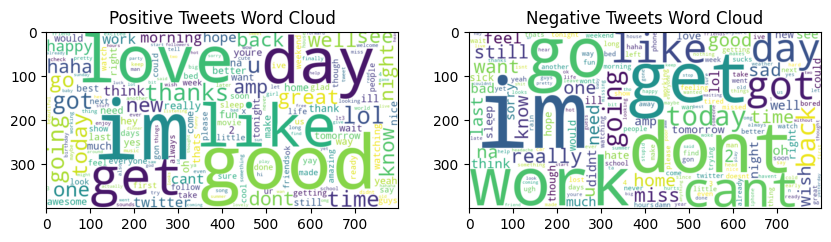

In [44]:
# 워드클라우드 생성
wc1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topN_positive_tokens_dict)
wc2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topN_negative_tokens_dict)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))

# 첫 번째 워드클라우드
plt.subplot(1, 2, 1)
plt.imshow(wc1, interpolation='bilinear')
# plt.axis('off')
plt.title('Positive Tweets Word Cloud')

# 두 번째 워드클라우드
plt.subplot(1, 2, 2)
plt.imshow(wc2, interpolation='bilinear')
# plt.axis('off')
plt.title('Negative Tweets Word Cloud')

plt.show()